In [127]:
import warnings
warnings.filterwarnings("ignore")
import tqdm

In [90]:
text = """  نشر العدل من خلال قضاء مستقل."""
import stanza
stanza.download('ar')       # This downloads the arabic models for the neural pipeline
nlp = stanza.Pipeline('ar') # This sets up a default neural pipeline in Arabic
doc = nlp(text)

2021-10-05 17:35:58 INFO: Downloading default packages for language: ar (Arabic)...
2021-10-05 17:35:59 INFO: File exists: /Users/mufseeramusthafa/stanza_resources/ar/default.zip.
2021-10-05 17:36:04 INFO: Finished downloading models and saved to /Users/mufseeramusthafa/stanza_resources.
2021-10-05 17:36:04 INFO: Loading these models for language: ar (Arabic):
| Processor | Package |
-----------------------
| tokenize  | padt    |
| mwt       | padt    |
| pos       | padt    |
| lemma     | padt    |
| depparse  | padt    |
| ner       | aqmar   |

2021-10-05 17:36:04 INFO: Use device: cpu
2021-10-05 17:36:04 INFO: Loading: tokenize
2021-10-05 17:36:04 INFO: Loading: mwt
2021-10-05 17:36:04 INFO: Loading: pos
2021-10-05 17:36:04 INFO: Loading: lemma
2021-10-05 17:36:05 INFO: Loading: depparse
2021-10-05 17:36:05 INFO: Loading: ner
2021-10-05 17:36:05 INFO: Done loading processors!


In [91]:
doc.sentences[0].print_dependencies()

('نشر', 0, 'root')
('العدل', 1, 'nmod')
('من', 5, 'case')
('خلال', 3, 'fixed')
('قضاء', 1, 'nmod')
('مستقل', 5, 'amod')
('.', 1, 'punct')


In [92]:
nlp_arabic = stanza.Pipeline(lang='ar', processors='tokenize,mwt,pos')
doc_arabic = nlp(text)

2021-10-05 17:36:06 INFO: Loading these models for language: ar (Arabic):
| Processor | Package |
-----------------------
| tokenize  | padt    |
| mwt       | padt    |
| pos       | padt    |

2021-10-05 17:36:06 INFO: Use device: cpu
2021-10-05 17:36:06 INFO: Loading: tokenize
2021-10-05 17:36:06 INFO: Loading: mwt
2021-10-05 17:36:06 INFO: Loading: pos
2021-10-05 17:36:06 INFO: Done loading processors!


In [93]:
print(*[f'word: {word.text}\tupos: {word.upos}' for sent in doc_arabic.sentences for word in sent.words], sep='\n')

word: نشر	upos: NOUN
word: العدل	upos: NOUN
word: من	upos: ADP
word: خلال	upos: ADP
word: قضاء	upos: NOUN
word: مستقل	upos: ADJ
word: .	upos: PUNCT


In [94]:
import stanza

nlp = stanza.Pipeline(lang='ar', processors='tokenize,mwt,pos,lemma,depparse')
doc = nlp(text)
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

2021-10-05 17:36:06 INFO: Loading these models for language: ar (Arabic):
| Processor | Package |
-----------------------
| tokenize  | padt    |
| mwt       | padt    |
| pos       | padt    |
| lemma     | padt    |
| depparse  | padt    |

2021-10-05 17:36:06 INFO: Use device: cpu
2021-10-05 17:36:06 INFO: Loading: tokenize
2021-10-05 17:36:06 INFO: Loading: mwt
2021-10-05 17:36:06 INFO: Loading: pos
2021-10-05 17:36:06 INFO: Loading: lemma
2021-10-05 17:36:06 INFO: Loading: depparse
2021-10-05 17:36:06 INFO: Done loading processors!


id: 1	word: نشر	head id: 0	head: root	deprel: root
id: 2	word: العدل	head id: 1	head: نشر	deprel: nmod
id: 3	word: من	head id: 5	head: قضاء	deprel: case
id: 4	word: خلال	head id: 3	head: من	deprel: fixed
id: 5	word: قضاء	head id: 1	head: نشر	deprel: nmod
id: 6	word: مستقل	head id: 5	head: قضاء	deprel: amod
id: 7	word: .	head id: 1	head: نشر	deprel: punct


In [95]:
text_1= "تقيم الفنانة ليتا كابيلوت معرضاً في مطلع العام المقبل في دبي، ويضم المعرض 35 لوحة، تركز خلالها على الوجوه .كابيلوت ولدت في العام 1961 في مجتمع غجري، لأم هجرتها قبل أن تتجاوز الثلاثة شهور من عمرها، لتتكفل جدتها الغجرية بتربيتها إلى سن الثامنة من عمرها، بعدما منعتها من الالتحاق بالمدرسة، إلا أن تسليمها في مابعد إلى أحد المياتم من قبل جدتها، شكل نقطة تحول بارزة في حياتها، لتتدرج رويداً رويداً في عالم الفن، بعد نضوج واكتشاف موهبتها، .ومن أبرز ما لاحظه النقاد حول أعمال ليتا كابيلوت أن أعمالها الفنية استطاعت أن تخلق عالماً أكبر من الصورة الفنية، حيث الوحة في هيئة كائن يتآلف من الألوان الزيتية والجبس والقماش، لتستطيع إثارة الجدل بحق من خلال استفزازها للخيال وهي تلتقط عوالم فتيات الشوارع والغانيات والمهرجين والموسيقيين، وقد جمعت كل ذلك في كتاب صدر عن دار فريدا كاهلو، كي تعد نفسها في تناول مشروعها المهم الذي تسميه أم المآسي الإنسانية، حيث تسلط خلاله الضوء على المرض العقلي محور تجربتها الجديدة، ضمن أسلوبها الذي يعتمد على الأبيض والأسود وتفلسفهما على نحو خاص ."

In [96]:
doc = nlp(text_1)

In [97]:
print(*[f'word: {word.text}\tdeprel: {word.deprel}\tupos: {word.upos}' for sent in doc.sentences for word in sent.words], sep='\n')

word: تقيم	deprel: root	upos: VERB
word: الفنانة	deprel: nsubj	upos: NOUN
word: ليتا	deprel: nmod	upos: X
word: كابيلوت	deprel: nsubj	upos: X
word: معرضاً	deprel: obj	upos: NOUN
word: في	deprel: case	upos: ADP
word: مطلع	deprel: obl	upos: NOUN
word: العام	deprel: nmod	upos: NOUN
word: المقبل	deprel: amod	upos: ADJ
word: في	deprel: case	upos: ADP
word: دبي	deprel: obl	upos: X
word: ،	deprel: punct	upos: PUNCT
word: و	deprel: cc	upos: CCONJ
word: يضم	deprel: conj	upos: VERB
word: المعرض	deprel: obj	upos: NOUN
word: 35	deprel: nummod	upos: NUM
word: لوحة	deprel: nmod	upos: NOUN
word: ،	deprel: punct	upos: PUNCT
word: تركز	deprel: acl	upos: VERB
word: خلال	deprel: case	upos: ADP
word: ها	deprel: obl	upos: PRON
word: على	deprel: case	upos: ADP
word: الوجوه	deprel: obl:arg	upos: NOUN
word: .	deprel: punct	upos: PUNCT
word: كابيلوت	deprel: nsubj:pass	upos: X
word: ولدت	deprel: parataxis	upos: VERB
word: في	deprel: case	upos: ADP
word: العام	deprel: obl	upos: NOUN
word: 1961	deprel: nummod	upo

In [98]:
doc = nlp(text_1)
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: (1,)	text: تقيم
id: (2,)	text: الفنانة
id: (3,)	text: ليتا
id: (4,)	text: كابيلوت
id: (5,)	text: معرضاً
id: (6,)	text: في
id: (7,)	text: مطلع
id: (8,)	text: العام
id: (9,)	text: المقبل
id: (10,)	text: في
id: (11,)	text: دبي
id: (12,)	text: ،
id: (13, 14)	text: ويضم
id: (15,)	text: المعرض
id: (16,)	text: 35
id: (17,)	text: لوحة
id: (18,)	text: ،
id: (19,)	text: تركز
id: (20, 21)	text: خلالها
id: (22,)	text: على
id: (23,)	text: الوجوه
id: (24,)	text: .
id: (25,)	text: كابيلوت
id: (26,)	text: ولدت
id: (27,)	text: في
id: (28,)	text: العام
id: (29,)	text: 1961
id: (30,)	text: في
id: (31,)	text: مجتمع
id: (32,)	text: غجري
id: (33,)	text: ،
id: (34, 35)	text: لأم
id: (36, 37)	text: هجرتها
id: (38,)	text: قبل
id: (39,)	text: أن
id: (40,)	text: تتجاوز
id: (41,)	text: الثلاثة
id: (42,)	text: شهور
id: (43,)	text: من
id: (44, 45)	text: عمرها
id: (46,)	text: ،
id: (47, 48)	text: لتتكفل
id: (49, 50)	text: جدتها
id: (51,)	text: الغجرية
id: (52, 54)	text: بتربيتها


In [99]:
text_1=text_1.replace("،",".")
text_1=text_1.replace("؟",".")

In [100]:
text_1

'تقيم الفنانة ليتا كابيلوت معرضاً في مطلع العام المقبل في دبي. ويضم المعرض 35 لوحة. تركز خلالها على الوجوه .كابيلوت ولدت في العام 1961 في مجتمع غجري. لأم هجرتها قبل أن تتجاوز الثلاثة شهور من عمرها. لتتكفل جدتها الغجرية بتربيتها إلى سن الثامنة من عمرها. بعدما منعتها من الالتحاق بالمدرسة. إلا أن تسليمها في مابعد إلى أحد المياتم من قبل جدتها. شكل نقطة تحول بارزة في حياتها. لتتدرج رويداً رويداً في عالم الفن. بعد نضوج واكتشاف موهبتها. .ومن أبرز ما لاحظه النقاد حول أعمال ليتا كابيلوت أن أعمالها الفنية استطاعت أن تخلق عالماً أكبر من الصورة الفنية. حيث الوحة في هيئة كائن يتآلف من الألوان الزيتية والجبس والقماش. لتستطيع إثارة الجدل بحق من خلال استفزازها للخيال وهي تلتقط عوالم فتيات الشوارع والغانيات والمهرجين والموسيقيين. وقد جمعت كل ذلك في كتاب صدر عن دار فريدا كاهلو. كي تعد نفسها في تناول مشروعها المهم الذي تسميه أم المآسي الإنسانية. حيث تسلط خلاله الضوء على المرض العقلي محور تجربتها الجديدة. ضمن أسلوبها الذي يعتمد على الأبيض والأسود وتفلسفهما على نحو خاص .'

In [101]:
text_1_list=text_1.split(".")

In [102]:
len(text_1_list)

20

In [103]:
import numpy as np
text_1_list= np.array(text_1_list)

In [104]:
import pandas as pd
pd.set_option("display.max_colwidth",None)
df = pd.DataFrame(text_1_list,columns=["sentence"])

In [105]:
df.head()

,sentence
0,تقيم الفنانة ليتا كابيلوت معرضاً في مطلع العام المقبل في دبي
1,ويضم المعرض 35 لوحة
2,تركز خلالها على الوجوه
3,كابيلوت ولدت في العام 1961 في مجتمع غجري
4,لأم هجرتها قبل أن تتجاوز الثلاثة شهور من عمرها


In [106]:
doc=nlp(text_1_list[0])

In [107]:
print(*[f' {word.text}\t  {word.upos}' for sent in doc.sentences for word in sent.words], sep='\n')

 تقيم	  VERB
 الفنانة	  NOUN
 ليتا	  X
 كابيلوت	  X
 معرضاً	  NOUN
 في	  ADP
 مطلع	  NOUN
 العام	  NOUN
 المقبل	  ADJ
 في	  ADP
 دبي	  X


In [108]:
text

'  نشر العدل من خلال قضاء مستقل.'

In [109]:
df.iloc[1].values

array([' ويضم المعرض 35 لوحة'], dtype=object)

In [110]:
def get_relation(sent):
    relation =""
    doc=nlp(sent)
    for sent in doc.sentences:
        for word in sent.words:
            if word.upos=="VERB":
                relation +=word.text
    return relation

In [111]:
relation = []
for i in range(len(text_1_list)):
    relation.append(get_relation(text_1_list[i]))

In [112]:
len(relation)

20

In [113]:
len(text_1_list)

20

In [114]:
def get_entities(sent):
    ent=""
    doc=nlp(sent)
    for sent in doc.sentences:
        for word in sent.words:
            if word.upos=="NOUN":
                ent =ent + " , " +word.text
            else:
                ent= ent + " "
    return ent

In [115]:
entities = []
for i in range(len(text_1_list)):
    entities.append(get_entities(text_1_list[i]))

In [116]:
entities

['  , الفنانة   , معرضاً  , مطلع , العام   ',
 '   , المعرض  , لوحة',
 '     , الوجوه',
 '    , العام   , مجتمع ',
 '         , شهور  , عمر ',
 '   , جدة    , تربية      , عمر ',
 '  , منعة   , الالتحاق , بالمدرسة',
 '   , تسليم   , مابعد  , أحد , المياتم  , قبل , جدة ',
 ' , شكل , نقطة , تحول   , حياة ',
 '      , عالم , الفن',
 '  , نضوج  , اكتشاف , موهبة ',
 '',
 '        , النقاد  , أعمال    , أعمال      , عالماً   , الصورة ',
 '  , الوحة  , هيئة    , الألوان   , الجبس ',
 '   , إثارة , الجدل , بحق   , استفزاز   , الخيال    , عوالم , فتيات , الشوارع    , المهرجين ',
 '    , كل   , كتاب   , دار  ',
 '   , نفس   , تناول , مشروع       , المآسي ',
 '     , الضوء  , المرض  , محور , تجربة  ',
 '           , تفلسف   , نحو ',
 '']

In [117]:
relation

['تقيم',
 'يضم',
 'تركز',
 'ولدت',
 'هجرتتتجاوز',
 'تتكفل',
 '',
 '',
 '',
 'تتدرج',
 '',
 '',
 'أحظاستطاعتتخلق',
 'يتآلف',
 'تستطيعتلتقط',
 'جمعتصدر',
 'تعدتسمي',
 'تسلط',
 'أسلوايعتمد',
 '']

In [289]:
df_e=pd.DataFrame(np.array(entities))
df_e.columns=["sentence"]
df_e

,sentence
0,", الفنانة , معرضاً , مطلع , العام"
1,", المعرض , لوحة"
2,", الوجوه"
3,", العام , مجتمع"
4,", شهور , عمر"
5,", جدة , تربية , عمر"
6,", منعة , الالتحاق , بالمدرسة"
7,", تسليم , مابعد , أحد , المياتم , قبل , جدة"
8,", شكل , نقطة , تحول , حياة"
9,", عالم , الفن"


In [290]:
df_e.drop([df_e.index[11],df_e.index[6],df_e.index[7],df_e.index[8],df_e.index[10],df_e.index[19],df_e.index[2]],inplace=True)

In [291]:
df_r = pd.DataFrame(np.array(relation))
df_r.columns= ["relations"]

In [292]:
df_r.drop([df_r.index[11],df_r.index[6],df_r.index[7],df_r.index[8],df_r.index[10],df_r.index[19],df_r.index[2]],inplace=True)

In [293]:
df_r.reset_index(inplace=True,drop=True)
df_e.reset_index(inplace=True,drop=True)

In [295]:
df_e["sentence"]=df_e["sentence"].str.replace(" , "," ") 

In [304]:
df_e["sentence"]

0                                               الفنانة   معرضاً  مطلع العام   
1                                                                  المعرض  لوحة
2                                                                العام   مجتمع 
3                                                                    شهور  عمر 
4                                                        جدة    تربية      عمر 
5                                                                     عالم الفن
6                                  النقاد  أعمال    أعمال      عالماً   الصورة 
7                                               الوحة  هيئة    الألوان   الجبس 
8        إثارة الجدل بحق   استفزاز   الخيال    عوالم فتيات الشوارع    المهرجين 
9                                                             كل   كتاب   دار  
10                                              نفس   تناول مشروع       المآسي 
11                                                   الضوء  المرض  محور تجربة  
12                                      

In [307]:
df_e["sentence"]=df_e["sentence"].str.replace("   "," ")

In [317]:
df_e["sentence"]

0                                         الفنانة معرضاً  مطلع العام 
1                                                        المعرض  لوحة
2                                                        العام مجتمع 
3                                                          شهور  عمر 
4                                                    جدة  تربية  عمر 
5                                                           عالم الفن
6                                النقاد  أعمال  أعمال  عالماً الصورة 
7                                         الوحة  هيئة  الألوان الجبس 
8      إثارة الجدل بحق استفزاز الخيال  عوالم فتيات الشوارع  المهرجين 
9                                                       كل كتاب دار  
10                                          نفس تناول مشروع   المآسي 
11                                         الضوء  المرض  محور تجربة  
12                                                         تفلسف نحو 
Name: sentence, dtype: object

In [329]:
source = df_e["sentence"].str.rsplit().str[0]

In [330]:
target = df_e["sentence"].str.split().str[1]

In [336]:
edge =  df_r["relations"]

In [337]:
kg_df = pd.DataFrame({"source":source,"target":target,"edge":edge})

In [338]:
kg_df

,source,target,edge
0,الفنانة,معرضاً,تقيم
1,المعرض,لوحة,يضم
2,العام,مجتمع,ولدت
3,شهور,عمر,هجرتتتجاوز
4,جدة,تربية,تتكفل
5,عالم,الفن,تتدرج
6,النقاد,أعمال,أحظاستطاعتتخلق
7,الوحة,هيئة,يتآلف
8,إثارة,الجدل,تستطيعتلتقط
9,كل,كتاب,جمعتصدر


In [348]:
# create a directed_graph from a  dataframe
G= nx.from_pandas_edgelist(kg_df,"source", "target", edge_attr=True , create_using=nx.MultiDiGraph())

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

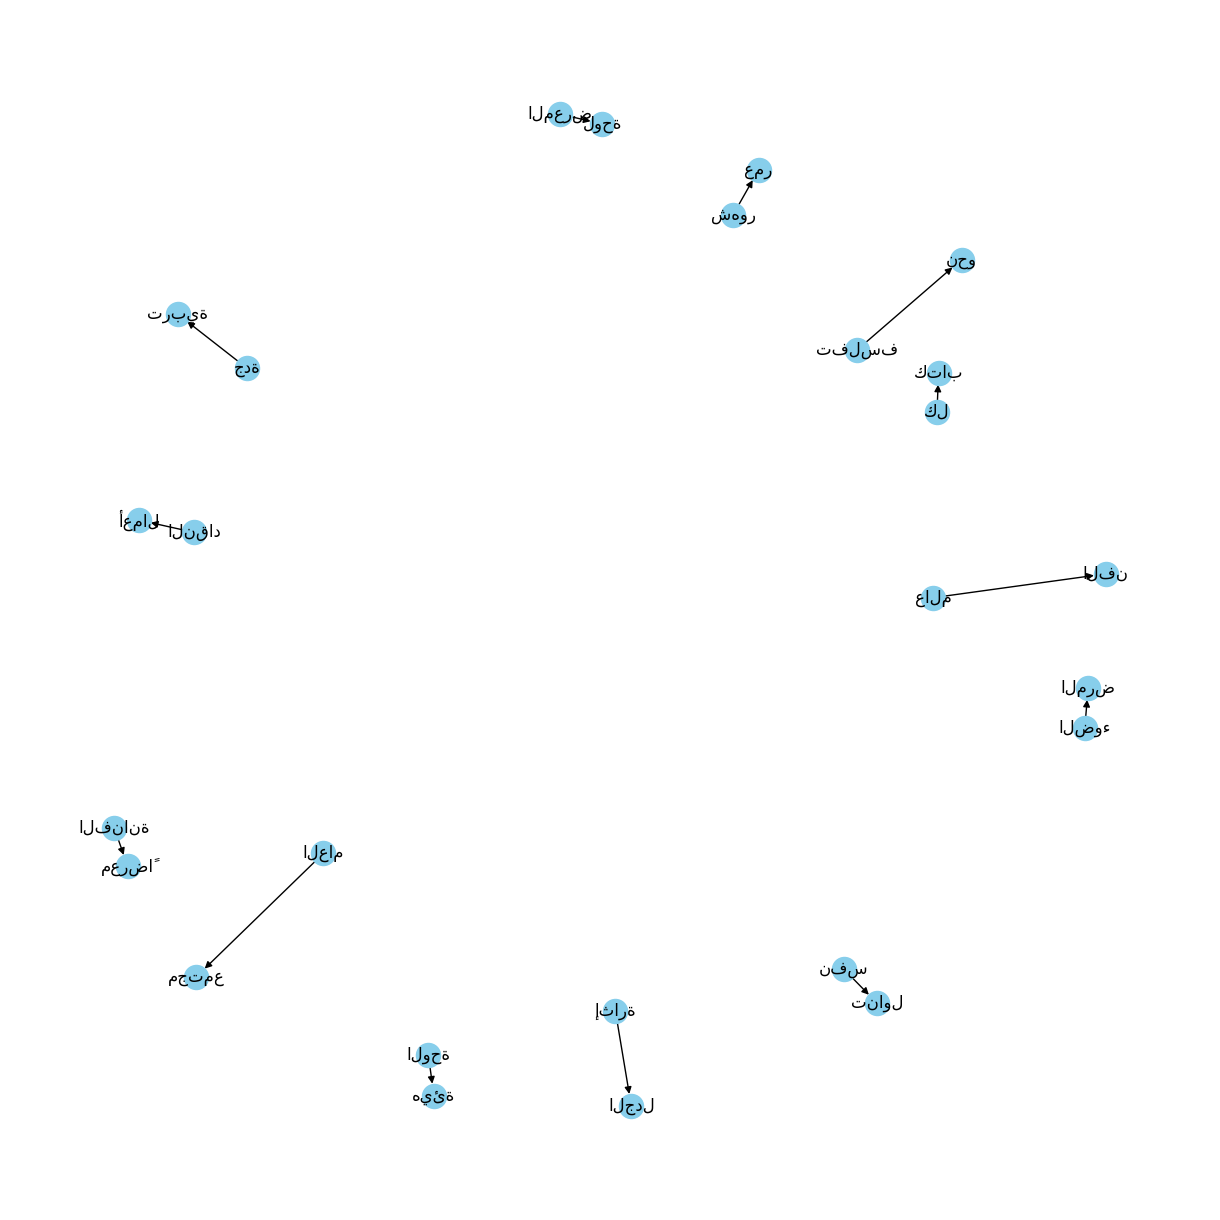

In [349]:
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(12,12))

pos=nx.spring_layout(G)
nx.draw(G,with_labels=True,node_color="skyblue",edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

In [346]:
pip install networkx

  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [350]:
kg_df.to_csv("final_kg.csv")